In [ ]:
#SINGLE NEURON

In [1]:
# First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  # Here is where you differentiate the model values with respect to the loss function
  dw, db = t.gradient(current_loss, [model.w, model.b])
  # And here is where you update the model values based on the learning rate chosen
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss

# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

In [3]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.09

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=-0.41 b=5.86, loss=27.47032
Epoch  2: w=-0.02 b=5.28, loss=22.43888
Epoch  3: w=0.16 b=4.69, loss=18.46284
Epoch  4: w=0.33 b=4.16, loss=15.19137
Epoch  5: w=0.49 b=3.68, loss=12.49958
Epoch  6: w=0.63 b=3.25, loss=10.28476
Epoch  7: w=0.76 b=2.85, loss=8.46238
Epoch  8: w=0.87 b=2.50, loss=6.96291
Epoch  9: w=0.98 b=2.17, loss=5.72914
Epoch 10: w=1.07 b=1.88, loss=4.71398
Epoch 11: w=1.16 b=1.61, loss=3.87870
Epoch 12: w=1.24 b=1.37, loss=3.19143
Epoch 13: w=1.31 b=1.15, loss=2.62593
Epoch 14: w=1.37 b=0.95, loss=2.16064
Epoch 15: w=1.43 b=0.77, loss=1.77779
Epoch 16: w=1.48 b=0.60, loss=1.46278
Epoch 17: w=1.53 b=0.45, loss=1.20359
Epoch 18: w=1.57 b=0.32, loss=0.99032
Epoch 19: w=1.61 b=0.20, loss=0.81484
Epoch 20: w=1.65 b=0.08, loss=0.67046
Epoch 21: w=1.68 b=-0.02, loss=0.55166
Epoch 22: w=1.71 b=-0.11, loss=0.45391
Epoch 23: w=1.74 b=-0.19, loss=0.37348
Epoch 24: w=1.76 b=-0.27, loss=0.30730
Epoch 25: w=1.79 b=-0.33, loss=0.2

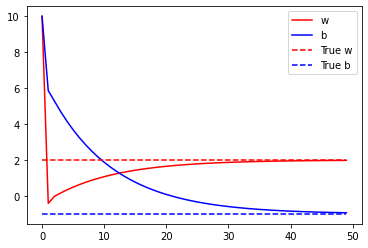

In [5]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

In [6]:
#MULTI-NEURON

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [8]:
#First lets re-train our original single layer network and see what the prediction is for X = 10.0 and what the learned weights are.

In [9]:
my_layer = keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([my_layer])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 8ms/step - loss: 27.0770
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 21.6027
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 17.2896
Epoch 4/500
1/1 [==============================] - 0s 999us/step - loss: 13.8903
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 11.2100
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 9.0954
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 7.4262
Epoch 8/500
1/1 [==============================] - 0s 998us/step - loss: 6.1073
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 5.0642
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 4.2383
Epoch 11/500
1/1 [==============================] - 0s 1000us/step - loss: 3.5832
Epoch 12/500
1/1 [==============================] - 0s 999us/step - loss: 3.0628
Epoch 13/500
1/1 [=============================

In [10]:
print(model.predict([10.0]))

[[18.979483]]


In [11]:
print(my_layer.get_weights())

[array([[1.9970263]], dtype=float32), array([-0.9907803], dtype=float32)]


In [12]:
# Next lets train a 2-layer network and see what its prediction and weights are.

In [13]:
my_layer_1 = keras.layers.Dense(units=2, input_shape=[1])
my_layer_2 = keras.layers.Dense(units=1)
model = tf.keras.Sequential([my_layer_1, my_layer_2])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 998us/step - loss: 2.9224
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5295
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9483
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 0.7141
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.6084
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5467
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5004
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4606
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4245
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3913
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3606
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3322
Epoch 13/500
1/1 [==============================] - 0s 2ms/

In [14]:
print(model.predict([10.0]))

[[18.999996]]


In [15]:
print(my_layer_1.get_weights())
print(my_layer_2.get_weights())

[array([[ 0.5344315, -1.2234634]], dtype=float32), array([-0.3526712 ,  0.23751172], dtype=float32)]
[array([[ 1.4541928],
       [-0.9994847]], dtype=float32), array([-0.24975759], dtype=float32)]


In [16]:
#Finally we can manually compute the output for our 2-layer network to better understand how it works.

In [17]:
value_to_predict = 10.0

layer1_w1 = (my_layer_1.get_weights()[0][0][0])
layer1_w2 = (my_layer_1.get_weights()[0][0][1])
layer1_b1 = (my_layer_1.get_weights()[1][0])
layer1_b2 = (my_layer_1.get_weights()[1][1])


layer2_w1 = (my_layer_2.get_weights()[0][0])
layer2_w2 = (my_layer_2.get_weights()[0][1])
layer2_b = (my_layer_2.get_weights()[1][0])

neuron1_output = (layer1_w1 * value_to_predict) + layer1_b1
neuron2_output = (layer1_w2 * value_to_predict) + layer1_b2

neuron3_output = (layer2_w1 * neuron1_output) + (layer2_w2 * neuron2_output) + layer2_b

print(neuron3_output)

[18.999996]


# Start with a simple neural network for MNIST
Note that there are 2 layers, one with 20 neurons, and one with 10.

The 10-neuron layer is our final layer because we have 10 classes we want to classify.

Train this, and you should see it get about 98% accuracy

In [18]:
import tensorflow as tf
data = tf.keras.datasets.mnist

(training_images, training_labels), (val_images, val_labels) = data.load_data()

training_images  = training_images / 255.0
val_images = val_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4020 - accuracy: 0.8894 - val_loss: 0.2335 - val_accuracy: 0.9325
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2242 - accuracy: 0.9359 - val_loss: 0.1928 - val_accuracy: 0.9408
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1879 - accuracy: 0.9450 - val_loss: 0.1756 - val_accuracy: 0.9463
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1670 - accuracy: 0.9513 - val_loss: 0.1769 - val_accuracy: 0.9462
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1528 - accuracy: 0.9546 - val_loss: 0.1619 - val_accuracy: 0.9512
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1424 - accuracy: 0.9579 - val_loss: 0.1502 - val_accuracy: 0.9549
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1325 - accuracy: 0.9606 - val_loss: 0.1477 - val_accurac

# Examine the test data
Using model.evaluate, you can get metrics for a test set. In this case we only have a training set and a validation set, so we can try it out with the validation set. The accuracy will be slightly lower, at maybe 96%. This is because the model hasn't previously seen this data and may not be fully generalized for all data. Still it's a pretty good score.

You can also predict images, and compare against their actual label. The [0] image in the set is a number 7, and here you can see that neuron 7 has a 9.9e-1 (99%+) probability, so it got it right!